In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Data
X=np.array([0.05,0.07,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.47,0.49,0.51,0.52])
y=np.array([0.063,0.066,0.071,0.081,0.092,0.107,0.126,0.150,0.181,0.224,0.246,0.271,0.301,0.317])

#np.polyfit(X,np.log(y),1)


Text(0.5, 1.0, 'C-σ')

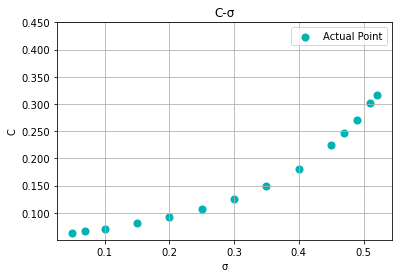

In [2]:
fig,ax=plt.subplots()
ax.scatter(X, y, s=50, color='#00b3b3', label='Actual Point')

ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.3f}"))
plt.yticks(np.arange(.100, .500, 0.050))
plt.xlabel('σ')
plt.ylabel('C')
plt.grid()
plt.legend()
plt.title("C-σ")

In [3]:
#define non-linear function
from scipy.optimize import curve_fit
import numpy as np
iteration=0

def nonlinear_function(t, a, b, c):
    global iteration
    print (iteration, "a=",a, "b=",b, "c=",c)
    iteration = iteration+1
    return a*np.exp(b*X)+c

#generated "good" data
t=X
y=y
sigmaNL = np.ones(14)*0.3

In [4]:
X.shape

(14,)

In [5]:
#First, try fitting the non-linear function with no initial guess
iteration=0
poptNL1, pcovNL1 = curve_fit(nonlinear_function, t, y,
                       absolute_sigma=True, sigma = None)

0 a= 1.0 b= 1.0 c= 1.0
1 a= 1.0 b= 1.0 c= 1.0
2 a= 1.0 b= 1.0 c= 1.0
3 a= 1.0000000149011612 b= 1.0 c= 1.0
4 a= 1.0 b= 1.0000000149011612 c= 1.0
5 a= 1.0 b= 1.0 c= 1.0000000149011612
6 a= -1.6833284642497581 b= 2.5818525926625018 c= 1.7555369211227783
7 a= 0.3755721756067051 b= 0.6453962778366974 c= -0.1052953183043639
8 a= 0.3755721812031666 b= 0.6453962778366974 c= -0.1052953183043639
9 a= 0.3755721756067051 b= 0.6453962874538514 c= -0.1052953183043639
10 a= 0.3755721756067051 b= 0.6453962778366974 c= -0.10529531673534138
11 a= -1.1442952391741579 b= 3.247952941774879 c= 1.1777298960435714
12 a= 0.34264131326187003 b= 1.0240790962169826 c= -0.3120338303939738
13 a= 0.34264131836762346 b= 1.0240790962169826 c= -0.3120338303939738
14 a= 0.34264131326187003 b= 1.0240791114769503 c= -0.3120338303939738
15 a= 0.34264131326187003 b= 1.0240790962169826 c= -0.3120338257443074
16 a= 0.07452651685845357 b= 1.7094626660008407 c= -0.04903736410212711
17 a= 0.32902254950836857 b= 1.12853257953617

In [6]:
iteration = 0
poptNL2, pcovNL2 = curve_fit(nonlinear_function, t, y,
                       absolute_sigma=True, sigma =None, p0=(0.014135206323671008,5.65600864508609,0.04662121499560668))

0 a= 0.014135206323671008 b= 5.65600864508609 c= 0.04662121499560668
1 a= 0.014135206323671008 b= 5.65600864508609 c= 0.04662121499560668
2 a= 0.014135206323671008 b= 5.65600864508609 c= 0.04662121499560668
3 a= 0.014135206534301996 b= 5.65600864508609 c= 0.04662121499560668
4 a= 0.014135206323671008 b= 5.656008729367187 c= 0.04662121499560668
5 a= 0.014135206323671008 b= 5.65600864508609 c= 0.04662121569031692
6 a= 0.01413520528888269 b= 5.6560087778899835 c= 0.046621216916820314


7 a= 0.014 b= 5.66 c= 0.047


Text(0.5, 1.0, 'Avg. MAV of C vs σ (Linearly Separable Dataset)')

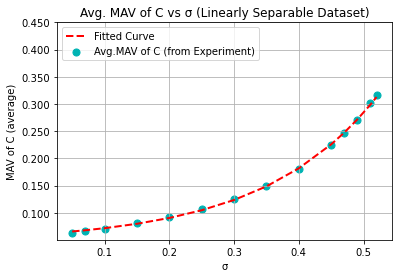

In [7]:
# Plot the fit data as an overlay on the scatter data
fig,ax=plt.subplots()
ax.scatter(X, y, s=50, color='#00b3b3', label='Avg.MAV of C (from Experiment)')
ax.plot(t, nonlinear_function(t, 0.014,5.66,0.047), linestyle='--', linewidth=2, color='red', label='Fitted Curve')
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.3f}"))
plt.yticks(np.arange(.100, .500, 0.050))
plt.xlabel('σ')
plt.ylabel('MAV of C (average)')
plt.grid()
plt.legend(loc=2)
plt.title("Avg. MAV of C vs σ (Linearly Separable Dataset)")

In [8]:
import numpy as np
x=np.arange(.100, .500, .050)
x

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])

8 a= 0.0142 b= 5.65 c= 0.047


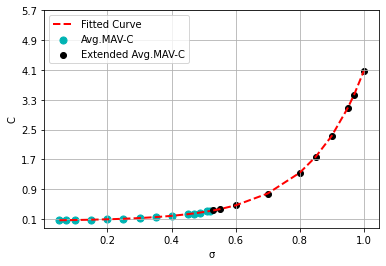

In [9]:
# Plot the fit data as an overlay on the scatter data
m=np.array([0.53,0.55,0.60,0.70,0.80,0.85,0.90,0.95,0.97,1.00])
n=np.array([0.328,0.362,0.465,0.783,1.34,1.77,2.33,3.08,3.44,4.07])
fig,ax=plt.subplots()
ax.scatter(X, y, s=50, color='#00b3b3', label='Avg.MAV-C')
ax.plot(t, nonlinear_function(t,0.0142,5.65,0.047), linestyle='--', linewidth=2, color='red', label='Fitted Curve')
ax.scatter(m, n,  color='black', label='Extended Avg.MAV-C')
ax.plot(m,n,linestyle='--', linewidth=2, color='red')
#ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.3f}"))
plt.yticks(np.arange(.100, 6.000, 0.800))
plt.xlabel('σ')
plt.ylabel('C')
plt.grid()
plt.legend(loc=2)
plt.savefig('demo1.svg')
# plt.title("Avg.MAV-C & Extended Avg. MAV-C vs σ")